In [17]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from sklearn.cluster import k_means

In [ ]:
path = '../../data/'

In [18]:
df = pd.read_csv(path + 'data.csv', index_col=0)

In [19]:
df = (df - df.mean()) / df.std()

In [20]:
df

x         y         z
t                                     
10.00000  0.739255  0.403750 -1.142997
10.00069  0.697038  0.403750 -1.085918
10.00139  0.718146  0.366966 -1.128727
10.00208  0.781472  0.391488 -1.185806
10.00278  0.749809  0.354704 -1.214345
...            ...       ...       ...
24.99653  0.274866  0.134001  0.783414
24.99722  0.327638 -0.025396  0.526559
24.99792  0.390963 -0.098963  0.469480
24.99861  0.380409 -0.049918  0.426671
24.99931  0.433181 -0.025396  0.312514

[21600 rows x 3 columns]

In [21]:
window = sp.signal.windows.bartlett(20)
df_smooth = pd.DataFrame({'x': sp.signal.convolve(df.x, window), 'y': sp.signal.convolve(df.y, window), 'z': sp.signal.convolve(df.z, window)})

In [22]:
df_smooth.to_csv(path + 'data_smooth.csv', index=0)

<AxesSubplot: xlabel='t'>

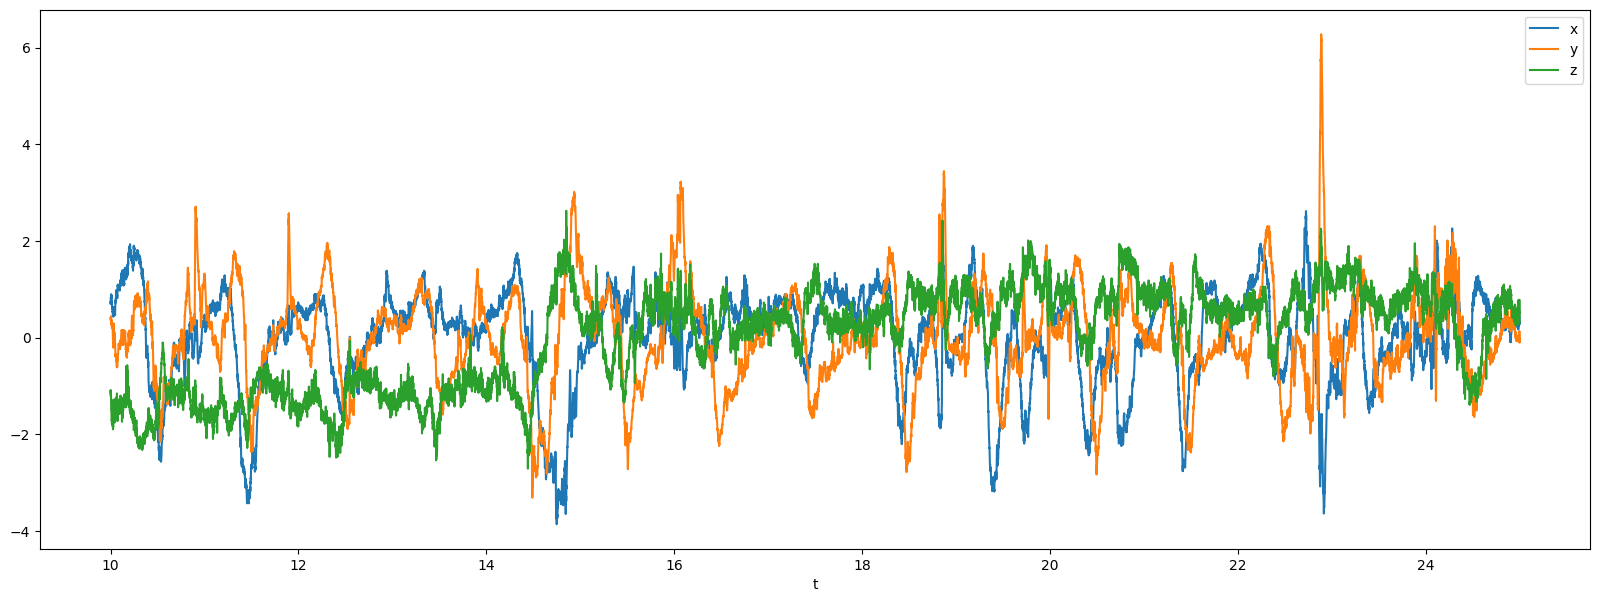

In [23]:
df.plot(figsize=(20, 7))

<AxesSubplot: xlabel='t'>

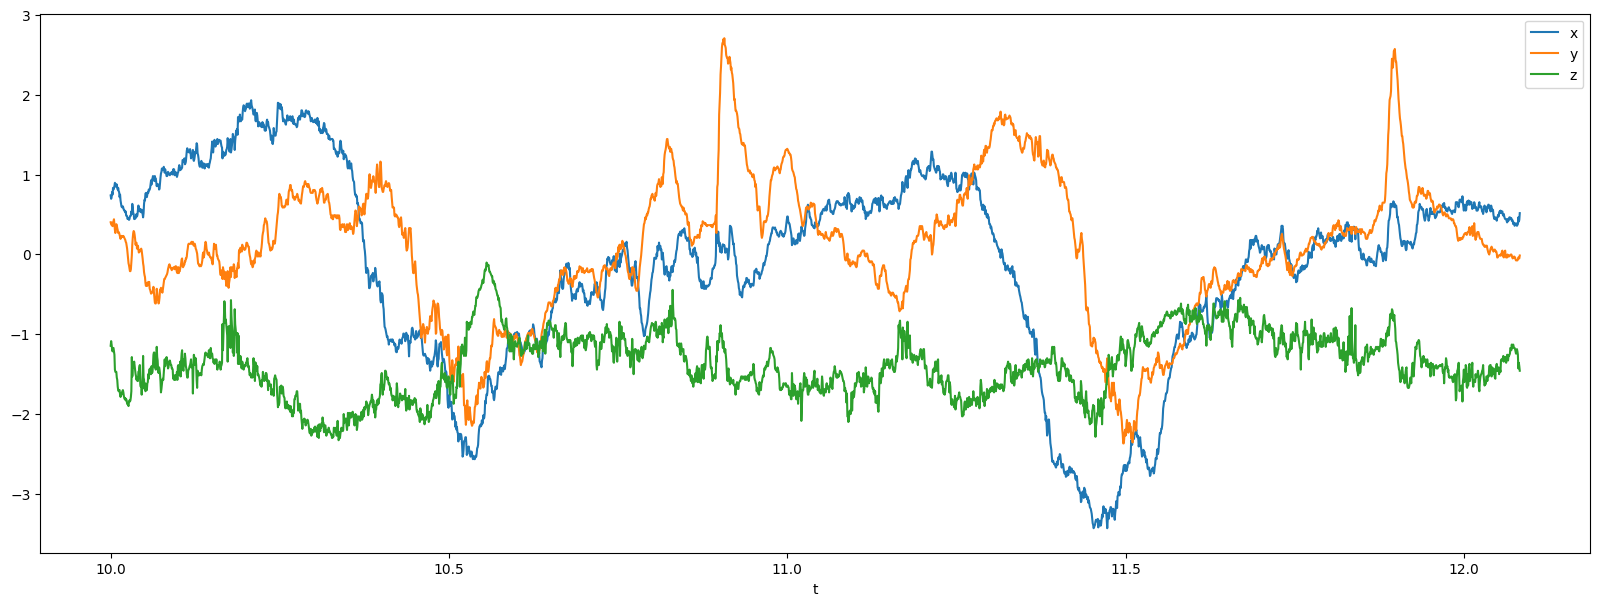

In [24]:
df.iloc[:3000].plot(figsize=(20, 7))

<AxesSubplot: >

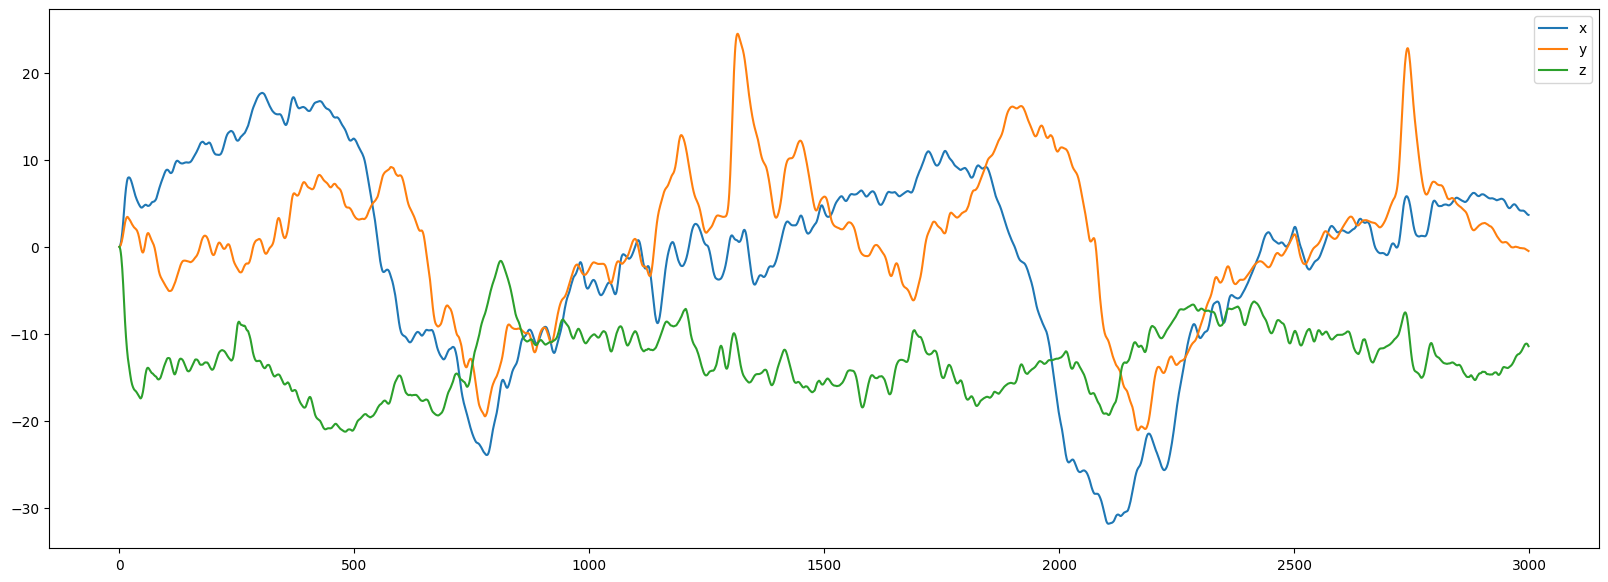

In [25]:
df_smooth.iloc[:3000].plot(figsize=(20, 7))

In [26]:
fig = px.scatter_3d(df_smooth, 'x', 'y', 'z', height=1200, width=1200)
fig.update_traces(marker=dict(size=2))

In [27]:
res = []
for clusters in range(2, 15):
    res.append(0)
    for i in range(15):
        res[-1] += k_means(df_smooth, init='random', n_clusters=clusters)[2]
    res[-1] /= 15

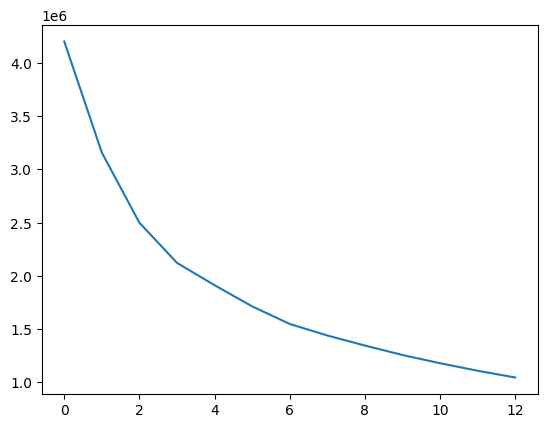

In [28]:
plt.plot(res)

In [29]:
df_smooth['cluster'] = k_means(df_smooth[['x', 'y', 'z']], n_clusters=4, random_state=4)[1]

In [30]:
df_smooth.cluster = df_smooth.cluster.astype('category')

In [31]:
fig = px.scatter_3d(df_smooth, 'x', 'y', 'z', color='cluster', height=1200, width=1200)
fig.update_traces(marker=dict(size=2))

In [32]:
fig = px.scatter(df_smooth, y=['x', 'y', 'z'], color='cluster')
fig.update_layout(plot_bgcolor='grey')
fig.update_traces(marker=dict(size=3))